In [4]:
import os
import sys
from pathlib import Path

# Get the absolute path to the project root
current_dir = Path().absolute()
project_root = current_dir.parent if 'notebooks' in str(current_dir) else current_dir

# Add the project root to Python path
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"Project root added to path: {project_root}")

from src.data.preprocessing import DataPreprocessor

# Initialize preprocessor with correct path (using the same path from your EDA notebook)
data_path = os.path.join(project_root, "data", "raw", "house_1")
preprocessor = DataPreprocessor(data_dir=data_path)

# Verify the data path exists
print(f"Data path exists: {os.path.exists(data_path)}")


Project root added to path: c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project
Data path exists: True


### Time series resampling Testing

INFO:src.data.preprocessing:Loading data...
INFO:src.data.preprocessing:Loaded data with shape: (10239433, 1)
INFO:src.data.preprocessing:Resampling data to 1H frequency...
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:77: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled['power_mean'] = data['power'].resample(freq).mean()
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled['power_max'] = data['power'].resample(freq).max()
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:79: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled


Resampled to 1H frequency:
Shape: (18873, 4)

Sample data:
                     power_mean  power_max  power_min    power_std
timestamp                                                         
2012-11-09 22:00:00  474.804428      904.0      324.0   139.709601
2012-11-09 23:00:00  442.738050     2500.0      198.0   394.944055
2012-11-10 00:00:00  608.406844     2494.0      198.0   827.178229
2012-11-10 01:00:00  826.403377     2436.0      135.0  1032.345421
2012-11-10 02:00:00  173.122137      218.0      136.0    23.596358


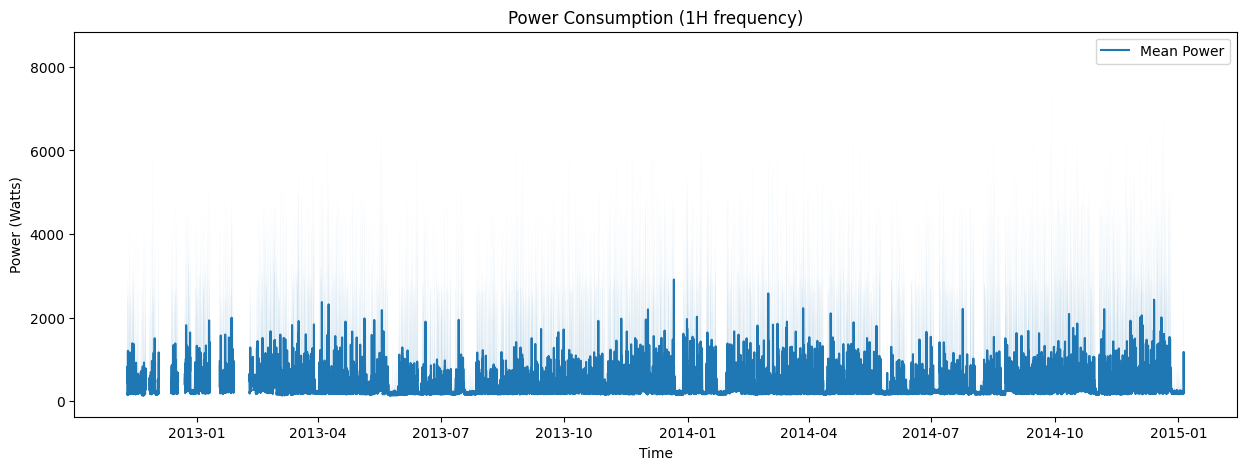

INFO:src.data.preprocessing:Resampling data to 1D frequency...
INFO:src.data.preprocessing:Resampled data shape: (788, 4)



Resampled to 1D frequency:
Shape: (788, 4)

Sample data:
            power_mean  power_max  power_min   power_std
timestamp                                               
2012-11-09  453.682620     2500.0      198.0  330.988047
2012-11-10  442.936934     2970.0      133.0  519.355116
2012-11-11  382.709539     4622.0      133.0  471.835250
2012-11-12  405.616459     2916.0      151.0  449.056081
2012-11-13  377.907964     3221.0      129.0  430.187494


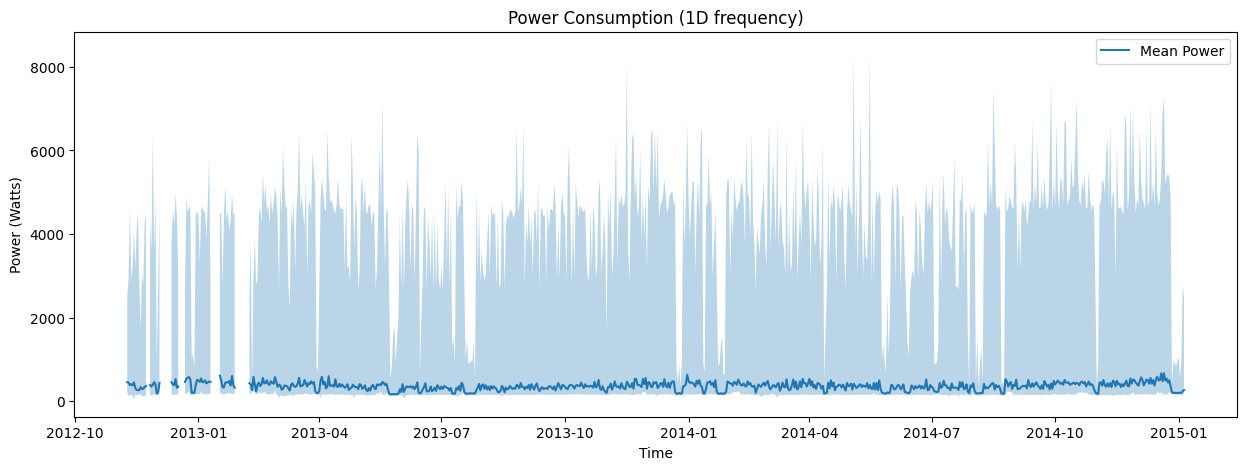

INFO:src.data.preprocessing:Resampling data to 1W frequency...
INFO:src.data.preprocessing:Resampled data shape: (114, 4)



Resampled to 1W frequency:
Shape: (114, 4)

Sample data:
            power_mean  power_max  power_min   power_std
timestamp                                               
2012-11-11  414.046932       4622        133  492.850651
2012-11-18  344.414391       4503         46  383.483142
2012-11-25  323.871291       4499        117  358.264543
2012-12-02  336.654482       6368        142  390.792520
2012-12-09  433.172338       4589        145  504.308135


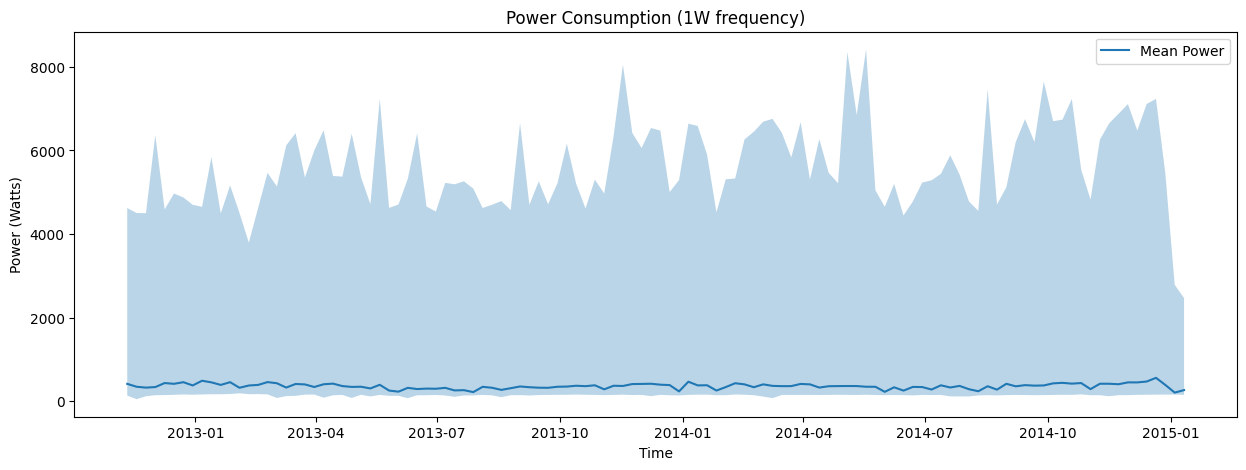

In [5]:
import matplotlib.pyplot as plt

# Test time series resampling
# Load raw data first
preprocessor = DataPreprocessor(data_dir=data_path)
raw_data = preprocessor.load_data()

# Test different resampling frequencies
frequencies = ['1H', '1D', '1W']
resampled_results = {}

for freq in frequencies:
    resampled_data = preprocessor.resample_timeseries(raw_data, freq=freq)
    resampled_results[freq] = resampled_data
    
    print(f"\nResampled to {freq} frequency:")
    print(f"Shape: {resampled_data.shape}")
    print("\nSample data:")
    print(resampled_data.head())
    
    # Plot the resampled data
    plt.figure(figsize=(15, 5))
    plt.plot(resampled_data.index, resampled_data['power_mean'], label='Mean Power')
    plt.fill_between(resampled_data.index, 
                    resampled_data['power_min'], 
                    resampled_data['power_max'], 
                    alpha=0.3)
    plt.title(f'Power Consumption ({freq} frequency)')
    plt.xlabel('Time')
    plt.ylabel('Power (Watts)')
    plt.legend()
    plt.show()

### Feature engineering Testing

In [6]:
# Use the complete pipeline
processed_data = preprocessor.run_preprocessing_pipeline(
    resample_freq='1H',
    treat_outliers=True
)

print("\nProcessed data shape:", processed_data.shape)

INFO:src.data.preprocessing:Starting preprocessing pipeline...
INFO:src.data.preprocessing:Loading data...
INFO:src.data.preprocessing:Loaded data with shape: (10239433, 1)
INFO:src.data.preprocessing:Resampling data to 1H frequency...
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:77: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled['power_mean'] = data['power'].resample(freq).mean()
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:78: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled['power_max'] = data['power'].resample(freq).max()
c:\Users\risha\OneDrive\Desktop\Projects\PORTF_1_Energy Demand Forecasting\energy-forecasting-project\src\data\preprocessing.py:79: FutureWarning: 'H' is deprecated and will be r


Processed data shape: (18873, 11)


#### 1. Missing Values Visualization

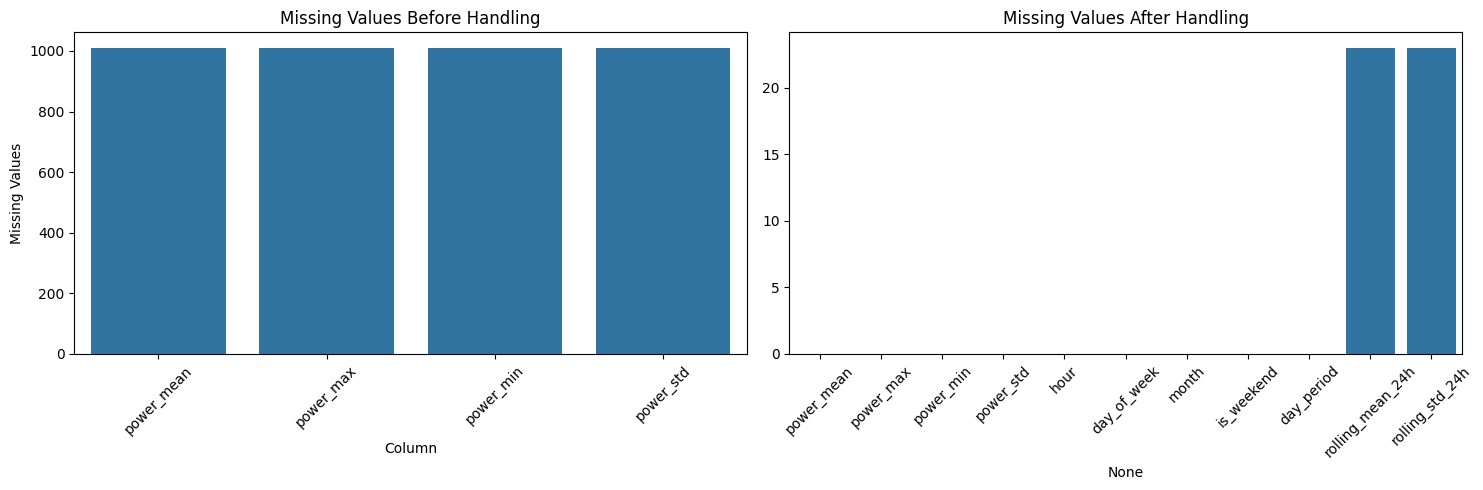

In [7]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
missing_before = pd.DataFrame({
    'Column': ['power_mean', 'power_max', 'power_min', 'power_std'],
    'Missing Values': [1011, 1011, 1011, 1011]
})
sns.barplot(data=missing_before, x='Column', y='Missing Values')
plt.title('Missing Values Before Handling')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
missing_after = processed_data.isnull().sum()
sns.barplot(x=missing_after.index, y=missing_after.values)
plt.title('Missing Values After Handling')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2. Feature Engineering Visualization


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

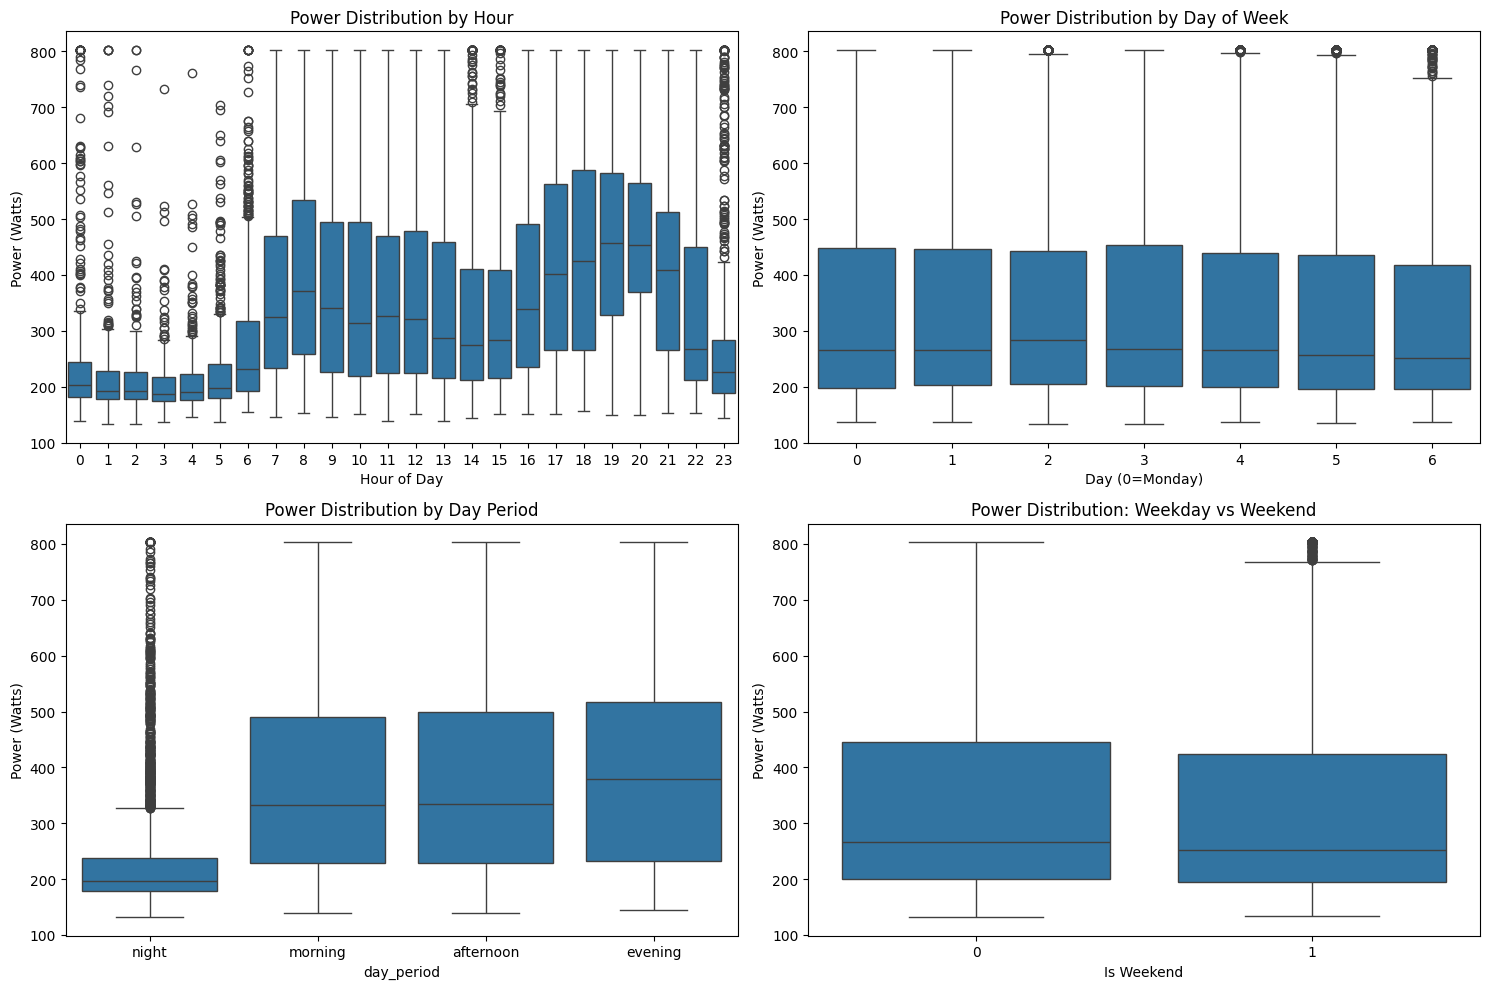

In [8]:
plt.figure(figsize=(15, 10))

# Time patterns
plt.subplot(2, 2, 1)
sns.boxplot(data=processed_data, x='hour', y='power_mean')
plt.title('Power Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Power (Watts)')

plt.subplot(2, 2, 2)
sns.boxplot(data=processed_data, x='day_of_week', y='power_mean')
plt.title('Power Distribution by Day of Week')
plt.xlabel('Day (0=Monday)')
plt.ylabel('Power (Watts)')

plt.subplot(2, 2, 3)
sns.boxplot(data=processed_data, x='day_period', y='power_mean')
plt.title('Power Distribution by Day Period')
plt.ylabel('Power (Watts)')

plt.subplot(2, 2, 4)
sns.boxplot(data=processed_data, x='is_weekend', y='power_mean')
plt.title('Power Distribution: Weekday vs Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Power (Watts)')

plt.tight_layout()
plt.show()


#### 3. Outlier Treatment Visualization


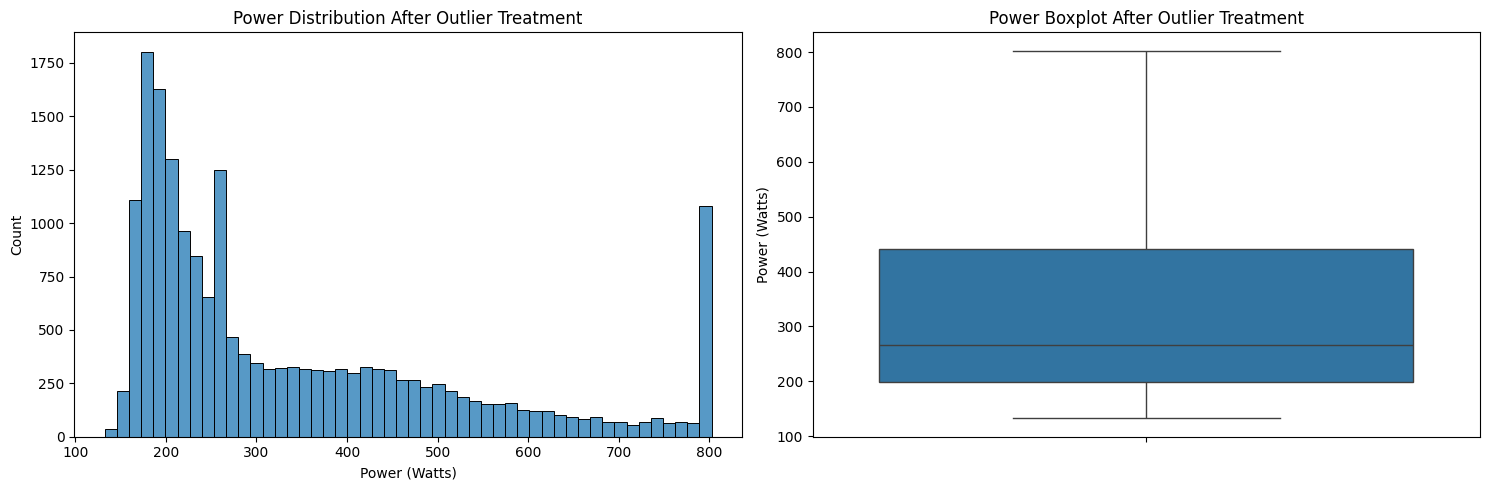

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=processed_data, x='power_mean', bins=50)
plt.title('Power Distribution After Outlier Treatment')
plt.xlabel('Power (Watts)')

plt.subplot(1, 2, 2)
sns.boxplot(data=processed_data, y='power_mean')
plt.title('Power Boxplot After Outlier Treatment')
plt.ylabel('Power (Watts)')

plt.tight_layout()
plt.show()

#### 4. Feature Correlations

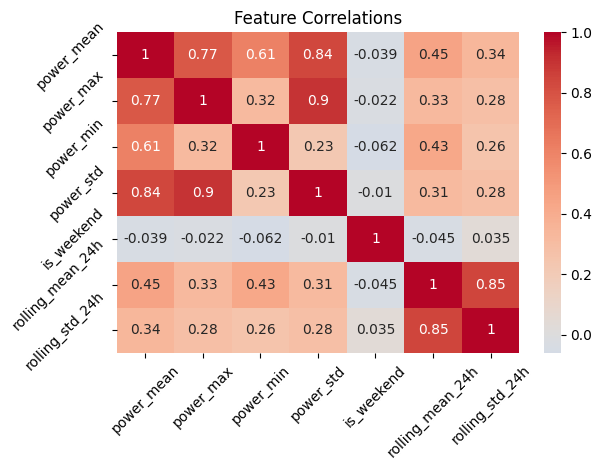


Summary Statistics:
         power_mean     power_max     power_min     power_std          hour  \
count  18873.000000  18873.000000  18873.000000  18873.000000  18873.000000   
mean     342.498309   1230.018554    211.813328    200.456228     11.498013   
std      184.498306   1309.632931     81.598003    274.266092      6.923690   
min      132.407407    182.000000     46.000000      0.000000      0.000000   
25%      198.783784    284.000000    156.000000     29.908398      5.000000   
50%      266.357751    498.000000    178.000000     49.277348     11.000000   
75%      440.295848   2131.000000    235.000000    308.122226     17.000000   
max      802.563944   8423.000000    868.000000   1817.203327     23.000000   

        day_of_week         month    is_weekend  rolling_mean_24h  \
count  18873.000000  18873.000000  18873.000000      18850.000000   
mean       3.005352      6.831611      0.287395        358.785276   
std        2.002019      3.581522      0.452559         95.8

In [10]:
numeric_cols = processed_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = processed_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(processed_data.describe())

print("\nFeature List:")
for i, col in enumerate(processed_data.columns, 1):
    print(f"{i}. {col}")